# (2) 고객 군집 분석 | 광고 프로모션 효율 증진을 위한 커머스 고객 세분화 | 파이썬 머신러닝

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customer_df = pd.read_csv('./data/customer.csv')

customer_df

,id,day_f_buy,buy_f_promo,buy_f_web,buy_f_catalog,buy_f_store,visit_web,promo3,promo4,promo5,promo1,promo2,complain,promo6,age,period
0,5524,58,3,8,10,4,7,0,0,0,0,0,0,1,59,1042
1,2174,38,2,1,1,2,5,0,0,0,0,0,0,0,62,196
2,4141,26,1,8,2,10,4,0,0,0,0,0,0,0,51,543
3,6182,26,2,2,0,4,6,0,0,0,0,0,0,0,32,136
4,5324,94,5,5,3,6,5,0,0,0,0,0,0,0,35,392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,46,2,9,3,4,5,0,0,0,0,0,0,0,49,612
2236,4001,56,7,8,2,5,7,0,0,0,1,0,0,0,70,132
2237,7270,91,1,2,3,13,6,0,1,0,0,0,0,0,35,386
2238,8235,8,2,6,5,10,3,0,0,0,0,0,0,0,60,387


## 나이로 나누기

<AxesSubplot:xlabel='age', ylabel='Count'>

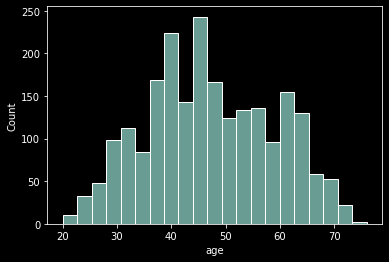

In [5]:
sns.histplot(customer_df['age'])

## 최근 구매한 사람 vs 구매한지 좀 된사람

<AxesSubplot:xlabel='day_f_buy', ylabel='Count'>

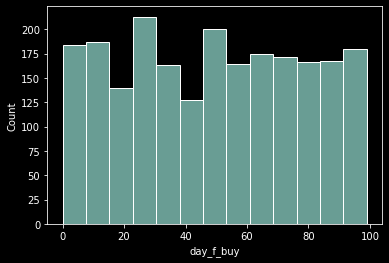

In [9]:
sns.histplot(customer_df['day_f_buy'])

## 가입기간에 따른 분류


<AxesSubplot:xlabel='period', ylabel='Count'>

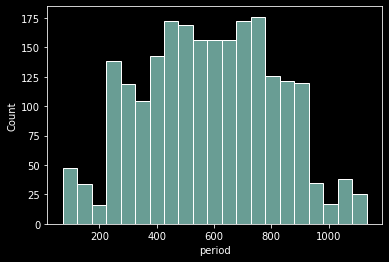

In [12]:
sns.histplot(customer_df['period'])

In [26]:
customer_df['complain'].value_counts()

0    2219
1      21
Name: complain, dtype: int64

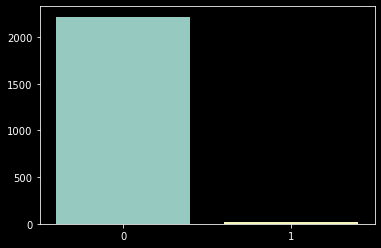

In [31]:
count_complain = customer_df['complain'].value_counts()

sns.barplot(x=count_complain.index, y=count_complain.values);

## 온라인 vs 오프라인 선호도

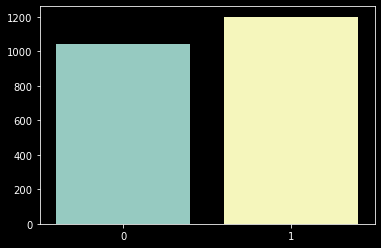

In [44]:
# 오프라인 노출 상품 구매 수 : 오프라인 매장 진열 상품 구매 수 + 전단지 노출 상품 구매 수
counts_buy_offline = customer_df['buy_f_store']+customer_df['buy_f_catalog']
# 온라인 노출 상품 구매 수 : 광고(프로모션) 상품 구매 수 + 웹사이트 표기 상품 구매 수
counts_buy_online = customer_df['buy_f_promo']+customer_df['buy_f_web']

# 오프라인 노출 상품을 온라인 노출 상품보다 많이 구매한 경우 True, 그렇지 않은 경우 False
s = counts_buy_offline > counts_buy_online
# True or False --> 1 or 0 으로 변환
s = s.astype(int)
customer_df['prefer_offline'] = s

# 1, 0 각각 카운트
count_offline = customer_df['prefer_offline'].value_counts()
# 시각화
sns.barplot(x=count_offline.index, y=count_offline.values);

## 프로모션 동의 여부에 따라 분류

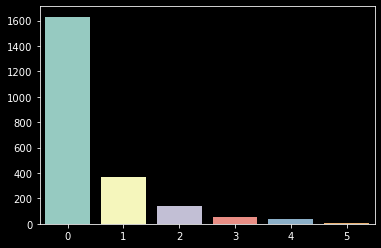

In [52]:
# 각 고객별 프로모션 동의 횟수 총합 계산 후 전체 동의 횟수 카운트
counts_check_promo = customer_df[['promo1','promo2','promo3','promo4','promo5','promo6']].sum(axis=1).value_counts()

# 시각화
sns.barplot(x=counts_check_promo.index, y=counts_check_promo.values);

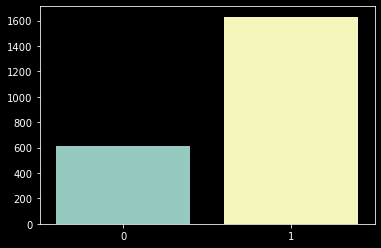

In [58]:
# 한번이라도 동의한사람
check_promo = customer_df[['promo1','promo2','promo3','promo4','promo5','promo6']].sum(axis=1)==0
check_promo = check_promo.astype(int)

count_check_promo_any = check_promo.value_counts()
# 시각화
sns.barplot(x=count_check_promo_any.index, y=count_check_promo_any.values);

In [57]:
check_promo

0       0
1       1
2       1
3       1
4       1
       ..
2235    1
2236    0
2237    0
2238    1
2239    0
Length: 2240, dtype: int64